# Groupo Bimbo 재고 수요 예측 ver.1

## 1. 패키지 로드 및 데이터 전처리

### 1.1 패키지 및 데이터 로드

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
client = pd.read_csv('cliente_tabla.csv')
product = pd.read_csv('producto_tabla.csv')
town = pd.read_csv('town_state.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

### 1.2 각 데이터 조회, 데이터 추출 및 데이터 타입 변경
#### 1.2.1 Client

In [2]:
client.head()

,Cliente_ID,NombreCliente
0,0,SIN NOMBRE
1,1,OXXO XINANTECATL
2,2,SIN NOMBRE
3,3,EL MORENO
4,4,SDN SER DE ALIM CUERPO SA CIA DE INT


캐글 경진대회에서 제공하는 설명에 따르면, client 데이터에는 중복된 고객 정보가 포함되어 있습니다. 이를 확인하고, 중복된 고객 정보를 제거합니다.

In [3]:
# 중복된 데이터 확인
client_dup = client[client.duplicated(subset='Cliente_ID', keep=False)]
client_dup

,Cliente_ID,NombreCliente
4,4,SDN SER DE ALIM CUERPO SA CIA DE INT
5,4,SDN SER DE ALIM CUERPO SA CIA DE INT
62,262,BALNEARIO IXTAPAN S DE R L DE C V
63,262,BALNEARIO IXTAPAN S DE R L DE C V
64,465,ESCUELA PREPARAROTIA NO 5
...,...,...
932959,9533930,SERVIFARMACIAS PACIFICO S A DE C V
933798,9612023,GRUPO FERMOSELLE S A DE C V
933799,9612023,GRUPO FERMOSELLE S A DE C V
934732,9694173,OXXO DR COSS


In [4]:
# 중복된 데이터 제거 및 재확인
client = client.drop_duplicates(subset='Cliente_ID')

client_dup = client[client.duplicated(subset='Cliente_ID', keep=False)]
client_dup

,Cliente_ID,NombreCliente


In [5]:
client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 930500 entries, 0 to 935361
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Cliente_ID     930500 non-null  int64 
 1   NombreCliente  930500 non-null  object
dtypes: int64(1), object(1)
memory usage: 21.3+ MB


#### 1.2.2 Product

In [6]:
product.head()

,Producto_ID,NombreProducto
0,0,NO IDENTIFICADO 0
1,9,Capuccino Moka 750g NES 9
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41
3,53,Burritos Sincro 170g CU LON 53
4,72,Div Tira Mini Doradita 4p 45g TR 72


In [7]:
product_dup = product[product.duplicated(subset='Producto_ID', keep=False)]
product_dup

,Producto_ID,NombreProducto


NombreProducto 변수에는 제품명과 제품의 무게가 포함되어 있습니다. 이를 분리하여, 제품명과 제품의 무게를 각각의 변수로 만듭니다.

In [8]:
# Product 텍스트 데이터에서 상품명, 무게, 개수, 코드 추출
product['Name'] = product['NombreProducto'].str.extract(r'^(.*?)(\d*\s\d+(kg|Kg|g|G|ml| ml|p|Reb)\s)', expand=False)[0]
product['Weight'] = product['NombreProducto'].str.extract(r'(\d*\s\d+(kg|Kg|g|G|ml| ml))', expand=False)[0]
product['Pieces'] = product['NombreProducto'].str.extract('(\d+(p|Reb))', expand=False)[0]
product['Code'] = product['NombreProducto'].str.extract(r'^.*\d+(kg|Kg|g|G|ml| ml|p|Reb)\s(.*?)\s\d+$', expand=False)[1]

product.head()

,Producto_ID,NombreProducto,Name,Weight,Pieces,Code
0,0,NO IDENTIFICADO 0,NaN,NaN,NaN,NaN
1,9,Capuccino Moka 750g NES 9,Capuccino Moka,750g,NaN,NES
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41,Bimbollos Ext sAjonjoli,480g,6p,BIM
3,53,Burritos Sincro 170g CU LON 53,Burritos Sincro,170g,NaN,CU LON
4,72,Div Tira Mini Doradita 4p 45g TR 72,Div Tira Mini Doradita,45g,4p,TR


In [9]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Producto_ID     2592 non-null   int64 
 1   NombreProducto  2592 non-null   object
 2   Name            2565 non-null   object
 3   Weight          2532 non-null   object
 4   Pieces          1195 non-null   object
 5   Code            2571 non-null   object
dtypes: int64(1), object(5)
memory usage: 121.6+ KB


#### 1.2.3 Town

In [10]:
town.head()

,Agencia_ID,Town,State
0,1110,2008 AG. LAGO FILT,"MÉXICO, D.F."
1,1111,2002 AG. AZCAPOTZALCO,"MÉXICO, D.F."
2,1112,2004 AG. CUAUTITLAN,ESTADO DE MÉXICO
3,1113,2008 AG. LAGO FILT,"MÉXICO, D.F."
4,1114,2029 AG.IZTAPALAPA 2,"MÉXICO, D.F."


In [11]:
town_dup = town[town.duplicated(subset='Agencia_ID', keep=False)]
town_dup

,Agencia_ID,Town,State


Town 변수에는 Town의 코드가 포함되어 있습니다. 이를 분리하여, Town의 코드와 Town의 이름을 각각의 변수로 만듭니다.

In [12]:
# Town 텍스트 데이터에서 Town_ID 추출
town['Town_ID'] = town['Town'].str.extract(r'(\d+)', expand=False)

town.head()

,Agencia_ID,Town,State,Town_ID
0,1110,2008 AG. LAGO FILT,"MÉXICO, D.F.",2008
1,1111,2002 AG. AZCAPOTZALCO,"MÉXICO, D.F.",2002
2,1112,2004 AG. CUAUTITLAN,ESTADO DE MÉXICO,2004
3,1113,2008 AG. LAGO FILT,"MÉXICO, D.F.",2008
4,1114,2029 AG.IZTAPALAPA 2,"MÉXICO, D.F.",2029


In [13]:
town.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Agencia_ID  790 non-null    int64 
 1   Town        790 non-null    object
 2   State       790 non-null    object
 3   Town_ID     790 non-null    object
dtypes: int64(1), object(3)
memory usage: 24.8+ KB


In [14]:
# 데이터 타입 변경
town['Town_ID'] = town['Town_ID'].astype('int64')

town.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Agencia_ID  790 non-null    int64 
 1   Town        790 non-null    object
 2   State       790 non-null    object
 3   Town_ID     790 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 24.8+ KB


#### 1.2.4 Train, Test

In [15]:
train.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,3
1,3,1110,7,3301,15766,1216,4,33.52,0,0.0,4
2,3,1110,7,3301,15766,1238,4,39.32,0,0.0,4
3,3,1110,7,3301,15766,1240,4,33.52,0,0.0,4
4,3,1110,7,3301,15766,1242,3,22.92,0,0.0,3


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74180464 entries, 0 to 74180463
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Semana             int64  
 1   Agencia_ID         int64  
 2   Canal_ID           int64  
 3   Ruta_SAK           int64  
 4   Cliente_ID         int64  
 5   Producto_ID        int64  
 6   Venta_uni_hoy      int64  
 7   Venta_hoy          float64
 8   Dev_uni_proxima    int64  
 9   Dev_proxima        float64
 10  Demanda_uni_equil  int64  
dtypes: float64(2), int64(9)
memory usage: 6.1 GB


In [17]:
# DataFrame의 모든 열을 순회하며
for column in train.columns:
    # 각 열을 가능한 한 작은 수치형으로 변환
    if train[column].dtype == 'float64':
        train[column] = pd.to_numeric(train[column], downcast='float')
    else:
        train[column] = pd.to_numeric(train[column], downcast='integer')

# 변환 후의 데이터 타입 확인
print(train.dtypes)

Semana                  int8
Agencia_ID             int16
Canal_ID                int8
Ruta_SAK               int16
Cliente_ID             int32
Producto_ID            int32
Venta_uni_hoy          int16
Venta_hoy            float32
Dev_uni_proxima        int32
Dev_proxima          float32
Demanda_uni_equil      int16
dtype: object


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74180464 entries, 0 to 74180463
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Semana             int8   
 1   Agencia_ID         int16  
 2   Canal_ID           int8   
 3   Ruta_SAK           int16  
 4   Cliente_ID         int32  
 5   Producto_ID        int32  
 6   Venta_uni_hoy      int16  
 7   Venta_hoy          float32
 8   Dev_uni_proxima    int32  
 9   Dev_proxima        float32
 10  Demanda_uni_equil  int16  
dtypes: float32(2), int16(4), int32(3), int8(2)
memory usage: 2.1 GB


In [19]:
train_semana_counts = train['Semana'].value_counts()
train_semana_counts

3    11165207
4    11009593
5    10615397
9    10408713
8    10406868
7    10382849
6    10191837
Name: Semana, dtype: int64

In [20]:
test.head()

,id,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID
0,0,11,4037,1,2209,4639078,35305
1,1,11,2237,1,1226,4705135,1238
2,2,10,2045,1,2831,4549769,32940
3,3,11,1227,1,4448,4717855,43066
4,4,11,1219,1,1130,966351,1277


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999251 entries, 0 to 6999250
Data columns (total 7 columns):
 #   Column       Dtype
---  ------       -----
 0   id           int64
 1   Semana       int64
 2   Agencia_ID   int64
 3   Canal_ID     int64
 4   Ruta_SAK     int64
 5   Cliente_ID   int64
 6   Producto_ID  int64
dtypes: int64(7)
memory usage: 373.8 MB


In [22]:
# DataFrame의 모든 열을 순회하며
for column in test.columns:
    # 각 열을 가능한 한 작은 수치형으로 변환
    if test[column].dtype == 'float64':
        test[column] = pd.to_numeric(test[column], downcast='float')
    else:
        test[column] = pd.to_numeric(test[column], downcast='integer')

# 변환 후의 데이터 타입 확인
print(test.dtypes)

id             int32
Semana          int8
Agencia_ID     int16
Canal_ID        int8
Ruta_SAK       int16
Cliente_ID     int32
Producto_ID    int32
dtype: object


In [23]:
test_semana_counts = test['Semana'].value_counts()
test_semana_counts

10    3538385
11    3460866
Name: Semana, dtype: int64

Train 데이터와 Test 데이터의 공통된 변수의 데이터 타입이 일치합니다.
앞서 다른 데이터셋에서도 공통된 변수의 데이터 타입을 일치시킵니다.

In [24]:
# client, product, town 데이터셋의 데이터 타입을 변경
client['Cliente_ID'] = client['Cliente_ID'].astype('int32')
product['Producto_ID'] = product['Producto_ID'].astype('int32')
town['Agencia_ID'] = town['Agencia_ID'].astype('int16')

In [25]:
client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 930500 entries, 0 to 935361
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Cliente_ID     930500 non-null  int32 
 1   NombreCliente  930500 non-null  object
dtypes: int32(1), object(1)
memory usage: 17.7+ MB


In [26]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Producto_ID     2592 non-null   int32 
 1   NombreProducto  2592 non-null   object
 2   Name            2565 non-null   object
 3   Weight          2532 non-null   object
 4   Pieces          1195 non-null   object
 5   Code            2571 non-null   object
dtypes: int32(1), object(5)
memory usage: 111.5+ KB


In [27]:
town.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Agencia_ID  790 non-null    int16 
 1   Town        790 non-null    object
 2   State       790 non-null    object
 3   Town_ID     790 non-null    int64 
dtypes: int16(1), int64(1), object(2)
memory usage: 20.2+ KB


In [28]:
for column in town.columns:
    if town[column].dtype == 'int64':
        town[column] = pd.to_numeric(town[column], downcast='integer')

print(town.dtypes)

Agencia_ID     int16
Town          object
State         object
Town_ID        int16
dtype: object


### 1.3 추가 피처 생성

#### 1.3.1 Product 가격 계산
Train 데이터셋의 Venta_uni_hoy, Venta_hoy, Dev_uni_proxima, Dev_proxima 컬럼을 이용하여 Product별 가격을 계산하여 추가합니다.

In [29]:
product_price = pd.DataFrame()
product_price['Producto_ID'] = train['Producto_ID']
product_price['Sales_Price'] = train['Venta_hoy'] / train['Venta_uni_hoy']
product_price['Return_Price'] = train['Dev_proxima'] / train['Dev_uni_proxima']

product_price.head()

,Producto_ID,Sales_Price,Return_Price
0,1212,8.38,NaN
1,1216,8.38,NaN
2,1238,9.83,NaN
3,1240,8.38,NaN
4,1242,7.64,NaN


In [30]:
product_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74180464 entries, 0 to 74180463
Data columns (total 3 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Producto_ID   int32  
 1   Sales_Price   float32
 2   Return_Price  float32
dtypes: float32(2), int32(1)
memory usage: 848.9 MB


In [31]:
# 수직으로 데이터 병합 및 그룹화하여 중앙값으로 대체
sales_price = product_price.drop('Return_Price', axis=1).dropna().rename(columns={'Sales_Price': 'price'})
return_price = product_price.drop('Sales_Price', axis=1).dropna().rename(columns={'Return_Price': 'price'})
prices = pd.concat([sales_price, return_price])
prices = prices.groupby('Producto_ID')['price'].median().reset_index()

prices.head()

,Producto_ID,price
0,41,18.129999
1,53,14.300000
2,72,3.700000
3,73,21.320000
4,100,21.580000


In [32]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1799 entries, 0 to 1798
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Producto_ID  1799 non-null   int64  
 1   price        1799 non-null   float32
dtypes: float32(1), int64(1)
memory usage: 21.2 KB


#### 1.3.2 Product 무게, 품목 코드

Product 데이터 weight, pieces, code 컬럼을 추출하는 과정 중, 일부 데이터에서 띄어쓰기 이슈와 데이터 누락 이슈가 발생한 것으로 보입니다.

weight의 경우 고려하지 못한 단위계가 존재하여 일부 추출이 제대로 되지 않았으며, 여러 단위가 혼합되어 있어 단위를 통일시켜 수치로 나타내는 것이 어려웠습니다.

pieces의 경우 일부 데이터의 이슈 외에도 Null값이 상당히 많아, 이를 대체할 수 있는 방법을 찾지 못했습니다.

code의 경우 null값은 적지만 Producto_ID의 규칙성에 반영되어 있을 것으로 보아, 인코딩의 필요성을 느끼지 못했습니다. 

### 1.4 데이터 병합 및 정리

학습에 필요한 데이터를 병합하고, 불필요한 데이터를 제거합니다. train 데이터와 test 데이터가 같은 형태로 저장합니다.

In [33]:
train = train.drop(['Venta_uni_hoy', 'Venta_hoy', 'Dev_uni_proxima', 'Dev_proxima'], axis=1)

train = pd.merge(train, town[['Agencia_ID', 'Town_ID']], on='Agencia_ID', how='left')

train = pd.merge(train, prices, on='Producto_ID', how='left')

train.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Demanda_uni_equil,Town_ID,price
0,3,1110,7,3301,15766,1212,3,2008,8.38
1,3,1110,7,3301,15766,1216,4,2008,8.38
2,3,1110,7,3301,15766,1238,4,2008,9.83
3,3,1110,7,3301,15766,1240,4,2008,8.38
4,3,1110,7,3301,15766,1242,3,2008,7.64


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74180464 entries, 0 to 74180463
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Semana             int8   
 1   Agencia_ID         int16  
 2   Canal_ID           int8   
 3   Ruta_SAK           int16  
 4   Cliente_ID         int32  
 5   Producto_ID        int32  
 6   Demanda_uni_equil  int16  
 7   Town_ID            int16  
 8   price              float32
dtypes: float32(1), int16(4), int32(2), int8(2)
memory usage: 2.1 GB


In [35]:
# 결측치 확인
train.isnull().sum()

Semana               0
Agencia_ID           0
Canal_ID             0
Ruta_SAK             0
Cliente_ID           0
Producto_ID          0
Demanda_uni_equil    0
Town_ID              0
price                0
dtype: int64

In [36]:
test = test.drop(['id'], axis=1)

test = pd.merge(test, town[['Agencia_ID', 'Town_ID']], on='Agencia_ID', how='left')

test = pd.merge(test, prices, on='Producto_ID', how='left')

test.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Town_ID,price
0,11,4037,1,2209,4639078,35305,2499,6.25
1,11,2237,1,1226,4705135,1238,2402,9.83
2,10,2045,1,2831,4549769,32940,2163,7.78
3,11,1227,1,4448,4717855,43066,2066,9.63
4,11,1219,1,1130,966351,1277,2042,8.10


In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999251 entries, 0 to 6999250
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Semana       int8   
 1   Agencia_ID   int16  
 2   Canal_ID     int8   
 3   Ruta_SAK     int16  
 4   Cliente_ID   int32  
 5   Producto_ID  int32  
 6   Town_ID      int16  
 7   price        float32
dtypes: float32(1), int16(3), int32(2), int8(2)
memory usage: 186.9 MB


In [38]:
# 결측치 확인
test.isnull().sum()

Semana             0
Agencia_ID         0
Canal_ID           0
Ruta_SAK           0
Cliente_ID         0
Producto_ID        0
Town_ID            0
price          25640
dtype: int64

In [39]:
# 결측값을 가지는 Producto_ID가 train 데이터셋에 없는지 확인
missing_price_ids = test[test['price'].isnull()]['Producto_ID']
missing_price_ids_not_in_train = missing_price_ids[~missing_price_ids.isin(train['Producto_ID'])]

missing_price_ids_not_in_train

180        37494
603        37495
1204       37495
1295       37495
1541       37495
           ...  
6997117    37202
6997429    37495
6997599    37495
6997986    37495
6999130    37495
Name: Producto_ID, Length: 25640, dtype: int32

캐글 경진대회에서 제공하는 설명에 따르면, test 데이터에는 train 데이터에 없는 제품이 포함되어 있습니다. 따라서 해당 제품의 가격도 알 수 없습니다.

이를 다루는 방식에 관해선 추후 모델링 과정에서 고려합니다.

## 2. 탐색적 데이터 분석(EDA)
### 2.1 통계량 확인

In [40]:
train.describe()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Demanda_uni_equil,Town_ID,price
count,7.418046e+07,7.418046e+07,7.418046e+07,7.418046e+07,7.418046e+07,7.418046e+07,7.418046e+07,7.418046e+07,7.418046e+07
mean,5.950021e+00,2.536509e+03,1.383181e+00,2.114855e+03,1.802119e+06,2.084081e+04,7.224564e+00,2.256114e+03,7.202690e+00
std,2.013175e+00,4.075124e+03,1.463266e+00,1.487744e+03,2.349577e+06,1.866392e+04,2.177119e+01,1.755542e+02,6.606032e+00
min,3.000000e+00,1.110000e+03,1.000000e+00,1.000000e+00,2.600000e+01,4.100000e+01,0.000000e+00,2.001000e+03,1.000000e-02
25%,4.000000e+00,1.312000e+03,1.000000e+00,1.161000e+03,3.567670e+05,1.242000e+03,2.000000e+00,2.070000e+03,6.760000e+00
50%,6.000000e+00,1.613000e+03,1.000000e+00,1.286000e+03,1.193385e+06,3.054900e+04,3.000000e+00,2.271000e+03,8.380000e+00
75%,8.000000e+00,2.036000e+03,1.000000e+00,2.802000e+03,2.371091e+06,3.742600e+04,6.000000e+00,2.386000e+03,1.259000e+01
max,9.000000e+00,2.575900e+04,1.100000e+01,9.991000e+03,2.015152e+09,4.999700e+04,5.000000e+03,3.216000e+03,6.412330e+03


### 2.2 이상치 확인

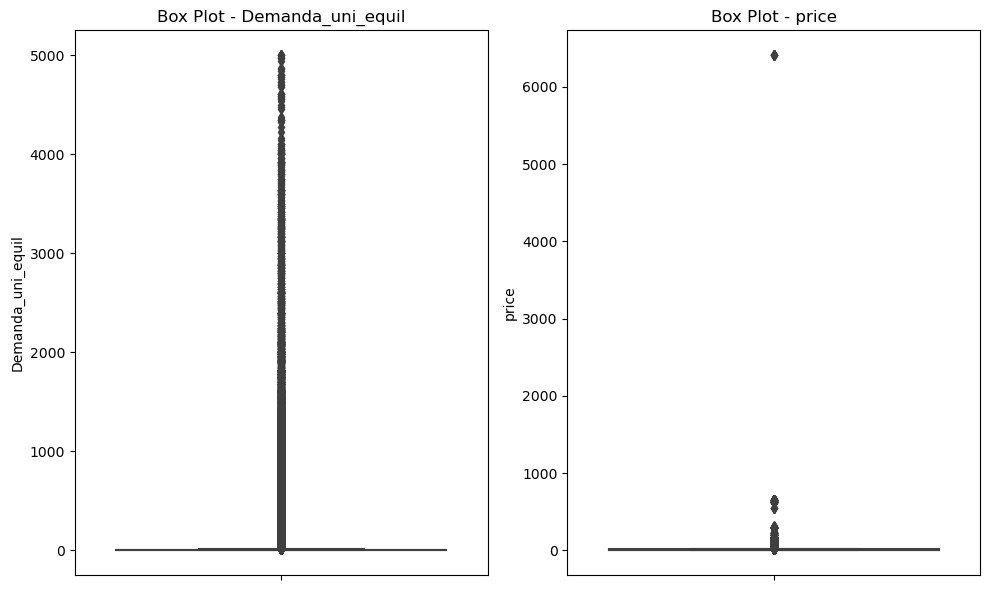

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# 이상치 확인을 위한 박스플롯 생성
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=train, y='Demanda_uni_equil')
plt.title('Box Plot - Demanda_uni_equil')

plt.subplot(1, 2, 2)
sns.boxplot(data=train, y='price')
plt.title('Box Plot - price')

plt.tight_layout()
plt.show()

In [42]:
outliers_price = train[train['price'] > 6000]
outliers_price

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Demanda_uni_equil,Town_ID,price
23441335,5,1167,2,7940,123514,36714,1,2116,6412.330078
23441419,5,1167,2,9014,19353,36714,1,2116,6412.330078
25897233,5,1379,2,9123,19635,36714,1,2330,6412.330078
26891938,5,1524,2,6149,1934733,36714,10,2152,6412.330078
31625797,5,2655,2,4114,1064922,36714,1,2655,6412.330078
33996656,6,1167,2,7940,123514,36714,1,2116,6412.330078


In [43]:
product[product['Producto_ID'] == 36714]

,Producto_ID,NombreProducto,Name,Weight,Pieces,Code
1692,36714,Pallet Canelitas Media KC 360g MLA 36714,Pallet Canelitas Media KC,360g,NaN,MLA


In [44]:
product_pallet = product[product['Name'].str.contains('Pallet', na=False)]
print(product_pallet)

      Producto_ID                                  NombreProducto  \
1296        35226              Pallet Canelitas KC 720g MLA 35226   
1486        35987  Pallet Lta SnValentin Beso Nuez 420g GBI 35987   
1692        36714        Pallet Canelitas Media KC 360g MLA 36714   
1776        36983  Medio Pallet Lata Kitty Navidad 300g GBI 36983   
1797        37017        Medio Pallet Surtido Fino 200g GBI 37017   
1850        37329            Pallet Principe KC 392g CU MLA 37329   

                                 Name Weight Pieces    Code  
1296              Pallet Canelitas KC   720g    NaN     MLA  
1486  Pallet Lta SnValentin Beso Nuez   420g    NaN     GBI  
1692        Pallet Canelitas Media KC   360g    NaN     MLA  
1776  Medio Pallet Lata Kitty Navidad   300g    NaN     GBI  
1797        Medio Pallet Surtido Fino   200g    NaN     GBI  
1850               Pallet Principe KC   392g    NaN  CU MLA  


In [45]:
train[train['Producto_ID'].isin([35226, 35987, 36714, 36983, 37017, 37329])]

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Demanda_uni_equil,Town_ID,price
17620712,4,1694,2,9146,26196,35987,288,2169,42.000000
23441335,5,1167,2,7940,123514,36714,1,2116,6412.330078
23441419,5,1167,2,9014,19353,36714,1,2116,6412.330078
25897233,5,1379,2,9123,19635,36714,1,2330,6412.330078
26891938,5,1524,2,6149,1934733,36714,10,2152,6412.330078
31625797,5,2655,2,4114,1064922,36714,1,2655,6412.330078
33996656,6,1167,2,7940,123514,36714,1,2116,6412.330078


#### 2.2.1 이상치 결론

Semana 컬럼은 순서형 데이터이고 숫자 사이의 순서를 학습할 수 있으므로 그대로 사용합니다.

그 외 식별하기 위해 만들어진 ID 컬럼과 Ruta_SAK 컬럼은 범주형 데이터이지만 인코딩되어 있습니다. 추가적인 스케일링은 수행하지 않습니다.

price컬럼과 Demanda_uni_equil 컬럼은 박스플롯을 통해 이상치를 확인한 결과, 이상치가 다수 존재합니다. 

**1. Demanda_uni_equil 컬럼의 이상치**
- 이상치들이 연속적으로 존재하며, 특정 기준으로 이상치를 제거하기에는 어렵습니다. 
- 이상치를 제거할 경우 데이터의 손실이 크기 때문에 이상치를 포함하여 모델링을 진행합니다.
- 만약 이상치의 영향이 클 경우, 스케일링을 통해 이상치에 덜 민감하도록 추후 조정할 수 있습니다.

**2. price 컬럼의 이상치**
- 크게 동떨어진 이상치가 발견되었습니다. 이들 데이터만 조회하여 검토한 결과, 이들 데이터는 모두 같은 제품(Producto_ID: 36714)에 대한 데이터입니다.
- product 테이블에서 해당 제품의 이름을 조회하고, pallet라는 단어 상 가격이 높을 수 있다고 가정하였습니다.
- 하지만, pallet이라는 단어가 포함된 다른 제품의 가격을 조회한 결과, 다른 제품(Producto_ID: 35987)의 가격과 큰 차이를 보여 이상치로 판단하였습니다. 따라서 해당 Producto_ID 데이터를 제거합니다.
- 다른 이상치들에 대해선 마찬가지로 포함하여 모델링을 진행하고, 필요하다면 이후에 스케일링을 통해 조정합니다.

In [46]:
train = train[train['Producto_ID'] != 36714]

### 2.3 변수 간 상관관계 확인

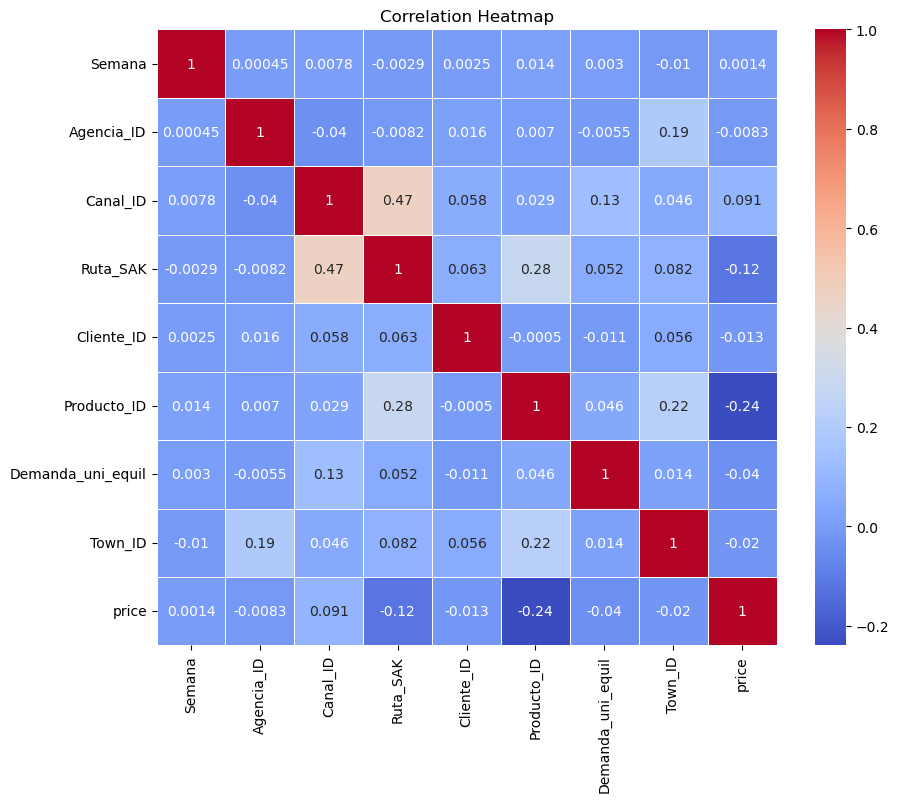

In [47]:
# 상관관계 행렬 계산
corr_matrix = train.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### 2.4 price컬럼의 분포 확인
test 데이터의 price 컬럼의 결측치를 채우기 위해, train 데이터의 price 컬럼의 분포를 확인합니다.

In [48]:
train_price_below_zero = train[train['price'] <= 0]
train_price_below_zero

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Demanda_uni_equil,Town_ID,price


로그 변환에 앞서 0이하인 데이터가 존재하는지 확인한 결과, 0이하인 데이터가 존재하지 않았습니다.

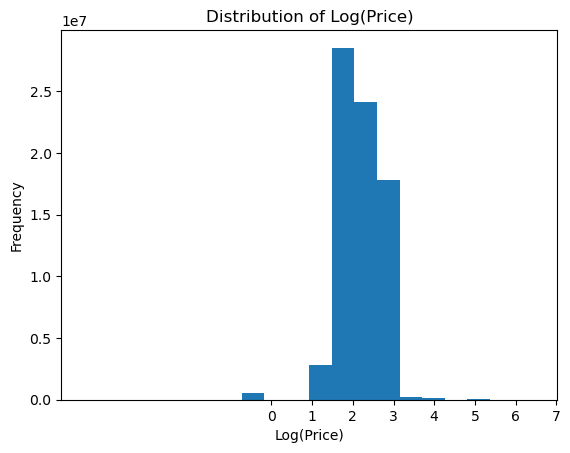

In [49]:
# price 분포 확인
plt.hist(np.log(train['price']), bins=20)
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.title('Distribution of Log(Price)')
plt.xticks(np.arange(0, np.log(train['price']).max()+1, 1))
plt.show()

In [50]:
# 왜도 계산
print('Skewness of Price: ', train['price'].skew())
print('Skewness of Log: ', np.log(train['price']).skew())

Skewness of Price:  7.1431365
Skewness of Log:  -0.40851858


로그 변환 전의 분포를 확인한 결과, 왼쪽으로 치우친 형태를 띄고 있습니다.

로그 변환 후의 분포를 확인한 결과, 큰 치우침 없이 대칭에 가까운 형태를 띄고 있습니다. 

이를 통해 price 컬럼에 로그 변환을 적용하고, test 데이터의 결측치를 채웁니다. 이 때, 결측치는 평균값으로 채웁니다.

In [51]:
# train 데이터셋의 price 열을 로그 변환
train.loc[:, 'price'] = np.log(train['price'])

train.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Demanda_uni_equil,Town_ID,price
0,3,1110,7,3301,15766,1212,3,2008,2.125848
1,3,1110,7,3301,15766,1216,4,2008,2.125848
2,3,1110,7,3301,15766,1238,4,2008,2.285439
3,3,1110,7,3301,15766,1240,4,2008,2.125848
4,3,1110,7,3301,15766,1242,3,2008,2.033398


In [52]:
test_price_below_zero = test[test['price'] <= 0]
test_price_below_zero

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Town_ID,price


In [53]:
# test 데이터셋의 price 열을 로그 변환
test.loc[:, 'price'] = np.log(test['price'])

test.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Town_ID,price
0,11,4037,1,2209,4639078,35305,2499,1.832582
1,11,2237,1,1226,4705135,1238,2402,2.285439
2,10,2045,1,2831,4549769,32940,2163,2.051556
3,11,1227,1,4448,4717855,43066,2066,2.264883
4,11,1219,1,1130,966351,1277,2042,2.091864


In [54]:
# train 데이터셋의 price 열의 평균값 계산
train_mean_price = train['price'].mean()

print(train_mean_price)

0.9077755212783813


In [55]:
# 결측값을 가지는 price 열을 train 데이터셋의 평균값으로 대체
test['price'] = test['price'].fillna(train_mean_price)

test.isnull().sum()

Semana         0
Agencia_ID     0
Canal_ID       0
Ruta_SAK       0
Cliente_ID     0
Producto_ID    0
Town_ID        0
price          0
dtype: int64

## 3. 모델링
LightGBM Regressor를 사용하여 모델링을 진행합니다.

범주형 변수가 많아 선형 모델보다 트리 모델이 더 적합하다고 판단하였습니다.

트리 기반 모델 중 큰 데이터셋에 적합한 LightGBM을 사용하였습니다.

### 3.1 LightGBM Regressor

In [56]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_log_error
import optuna

# 데이터를 훈련할 변수(X)와 타겟 변수(Y)로 분할합니다.
X = train.drop(['Demanda_uni_equil'], axis=1)
y = train['Demanda_uni_equil']

# 데이터를 학습 및 테스트 세트로 분할
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# RMSLE 평가 함수 정의
def rmsle(y_true, y_pred):
    return np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))

In [58]:
# LightGBM의 파라미터 정의
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# LightGBM 데이터 세트 생성
train_data = lgb.Dataset(X_train, label=y_train)

# 모델 훈련
model = lgb.train(params, train_data, num_boost_round=100)

# 테스트 데이터에서 예측
y_pred = model.predict(X_val)

In [59]:
score = rmsle(y_val, y_pred)
print("Score:", score)

Score: 0.7206183202331504


In [60]:
importance = model.feature_importance()
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

       Feature  Importance
5  Producto_ID         755
7        price         681
3     Ruta_SAK         414
2     Canal_ID         353
4   Cliente_ID         311
6      Town_ID         293
1   Agencia_ID         182
0       Semana          11


실제 제출 결과와 다를 수 있지만, 약 0.72의 스코어는 경진 대회 약 1700팀 중 1500위 내외의 순위에 해당합니다.

모델링을 개선하기 위해 추가적인 과정은 다음과 같습니다.
1. 모델링 과정 수정
- 주차별 데이터가 큰 의미를 가지지 못하고 있습니다.
- 훈련 데이터와 테스트 데이터를 분리할 때, 주차별 특성을 보다 잘 반영할 수 있도록 분리합니다.
- 1~9주차 데이터를 통해 10,11주차 데이터를 예측하는 목적에 맞게, 훈련데이터를 1~7주차 데이터로, 검증데이터를 8,9주차 데이터로 나누어 학습합니다.
- 추가 피처 엔지니어링에서도 주차별 특성을 보다 잘 반영할 수 있도록 수정합니다.

2. 추가 피처 엔지니어링
    
    2.1. 다른 변수에 대한 타겟 변수의 평균값을 변수로 추가
    - 제품별 평균 수요량, 고객별 평균 수요량, 도시-제품별 평균 수요량, 고객-제품별 평균 수요량을 변수로 추가합니다.

    2.2. 시간적 순서를 고려한 시차 특성 추가
    - 주차별 특성을 반영하기 위해, 주차별 특성을 추가합니다.
    - 2주 전 제품별 평균 수요량, 2주전 고객-제품별 평균 수요량을 변수로 추가합니다.

3. 하이퍼 파라미터 튜닝
- 최적 하이퍼 파라미터를 탐색합니다.

### 3.1 추가 피처 엔지니어링

#### 3.1.1 제품별 평균 수요량, 2주전 제품별 평균 수요량

In [61]:
# train 데이터셋의 제품별 평균 수요량
producto_mean = train.groupby('Producto_ID')['Demanda_uni_equil'].mean()
producto_mean = producto_mean.reset_index(name='Product_Mean_Demand')
producto_mean.head()

,Producto_ID,Product_Mean_Demand
0,41,367.442623
1,53,291.096491
2,72,4.896193
3,73,3.193657
4,100,8.814516


In [62]:
# 주별 데이터 분리
train_fv = train[train['Semana'].isin([3, 4, 5, 6, 7])]
train_fv_4w = train[train['Semana'].isin([4, 5])] 
train_fv_2w = train[train['Semana'].isin([6, 7])]
train_2w = train[train['Semana'].isin([8, 9])]

In [70]:
# train_fv 데이터셋의 제품별 평균 수요량
producto_mean_fv = train_fv.groupby('Producto_ID')['Demanda_uni_equil'].mean()
producto_mean_fv = producto_mean_fv.reset_index(name='Product_Mean_Demand')

# train_fv_4w 데이터셋의 제품별 평균 수요량
producto_mean_fv_4w = train_fv_4w.groupby('Producto_ID')['Demanda_uni_equil'].mean()
producto_mean_fv_4w = producto_mean_fv_4w.reset_index(name='Product_Mean_Demand_2w')

# train_fv_2w 데이터셋의 제품별 평균 수요량
producto_mean_fv_2w = train_fv_2w.groupby('Producto_ID')['Demanda_uni_equil'].mean()
producto_mean_fv_2w = producto_mean_fv_2w.reset_index(name='Product_Mean_Demand_2w')

# train_2w 데이터셋의 제품별 평균 수요량
producto_mean_2w = train_2w.groupby('Producto_ID')['Demanda_uni_equil'].mean()
producto_mean_2w = producto_mean_2w.reset_index(name='Product_Mean_Demand_2w')

#### 3.1.2 고객별 평균 수요량

In [64]:
# train 데이터셋의 고객별 평균 수요량
cliente_mean = train.groupby('Cliente_ID')['Demanda_uni_equil'].mean()
cliente_mean = cliente_mean.reset_index(name='Client_Mean_Demand')

# train_fv 데이터셋의 고객별 평균 수요량
cliente_mean_fv = train_fv.groupby('Cliente_ID')['Demanda_uni_equil'].mean()
cliente_mean_fv = cliente_mean_fv.reset_index(name='Client_Mean_Demand')

#### 3.1.3 도시-제품별 평균 수요량

In [65]:
# train 데이터셋의 도시-제품별 평균 수요량
town_producto_mean = train.groupby(['Town_ID', 'Producto_ID'])['Demanda_uni_equil'].mean().reset_index()
town_producto_mean = town_producto_mean.rename(columns={'Demanda_uni_equil': 'Town_Product_Mean_Demand'})
town_producto_mean.head()

,Town_ID,Producto_ID,Town_Product_Mean_Demand
0,2001,72,4.433088
1,2001,73,2.020575
2,2001,141,4.046875
3,2001,145,2.750000
4,2001,160,2.454545


In [66]:
# train_fv 데이터셋의 도시-제품별 평균 수요량
town_producto_mean_fv = train_fv.groupby(['Town_ID', 'Producto_ID'])['Demanda_uni_equil'].mean().reset_index()
town_producto_mean_fv = town_producto_mean_fv.rename(columns={'Demanda_uni_equil': 'Town_Product_Mean_Demand'})

#### 3.1.4 고객-제품별 평균 수요량, 2주전 고객-제품별 평균 수요량

In [67]:
# train 데이터셋의 고객-제품별 평균 수요량
cliente_producto_mean = train.groupby(['Cliente_ID', 'Producto_ID'])['Demanda_uni_equil'].mean().reset_index()
cliente_producto_mean = cliente_producto_mean.rename(columns={'Demanda_uni_equil': 'Client_Product_Mean_Demand'})

# train_fv 데이터셋의 고객-제품별 평균 수요량
cliente_producto_mean_fv = train_fv.groupby(['Cliente_ID', 'Producto_ID'])['Demanda_uni_equil'].mean().reset_index()
cliente_producto_mean_fv = cliente_producto_mean_fv.rename(columns={'Demanda_uni_equil': 'Client_Product_Mean_Demand'})

cliente_producto_mean.head()

,Cliente_ID,Producto_ID,Client_Product_Mean_Demand
0,26,1182,13.0
1,26,4767,42.0
2,26,30235,96.0
3,26,30314,48.0
4,26,31393,17.0


In [69]:
# train_fv_4w 데이터셋의 고객-제품별 평균 수요량
cliente_producto_mean_fv_4w = train_fv_4w.groupby(['Cliente_ID', 'Producto_ID'])['Demanda_uni_equil'].mean().reset_index()
cliente_producto_mean_fv_4w = cliente_producto_mean_fv_4w.rename(columns={'Demanda_uni_equil': 'Client_Product_Mean_Demand_2w'})

# train_fv_2w 데이터셋의 고객-제품별 평균 수요량
cliente_producto_mean_fv_2w = train_fv_2w.groupby(['Cliente_ID', 'Producto_ID'])['Demanda_uni_equil'].mean().reset_index()
cliente_producto_mean_fv_2w = cliente_producto_mean_fv_2w.rename(columns={'Demanda_uni_equil': 'Client_Product_Mean_Demand_2w'})

# train_2w 데이터셋의 고객-제품별 평균 수요량
cliente_producto_mean_2w = train_2w.groupby(['Cliente_ID', 'Producto_ID'])['Demanda_uni_equil'].mean().reset_index()
cliente_producto_mean_2w = cliente_producto_mean_2w.rename(columns={'Demanda_uni_equil': 'Client_Product_Mean_Demand_2w'})

### 3.2 추가 데이터 처리
#### 3.2.1 데이터 결합
각 데이터셋에 적절히 매칭합니다.

In [71]:
train.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Demanda_uni_equil,Town_ID,price
0,3,1110,7,3301,15766,1212,3,2008,2.125848
1,3,1110,7,3301,15766,1216,4,2008,2.125848
2,3,1110,7,3301,15766,1238,4,2008,2.285439
3,3,1110,7,3301,15766,1240,4,2008,2.125848
4,3,1110,7,3301,15766,1242,3,2008,2.033398


In [74]:
# train 데이터셋
# 1. train데이터셋에 producto_mean데이터셋을 Producto_ID가 일치하는 조건으로 결합
train = train.merge(producto_mean, on='Producto_ID', how='left')

# 2. train데이터셋에 producto_mean_fv_2w데이터셋을 Producto_ID가 일치하는 조건으로 결합
train = train.merge(producto_mean_fv_2w, on='Producto_ID', how='left')

# 3. train데이터셋에 clienete_mean데이터셋을 Cliente_ID가 일치하는 조건으로 결합
train = train.merge(cliente_mean, on='Cliente_ID', how='left')

# 4. train데이터셋에 town_producto_mean데이터셋을 Town_ID와 Producto_ID가 그룹화하여 일치하는 조건으로 결합
train = train.merge(town_producto_mean, on=['Town_ID', 'Producto_ID'], how='left')

# 5. train데이터셋에 cliente_producto_mean데이터셋을 Cliente_ID와 Producto_ID가 그룹화하여 일치하는 조건으로 결합
train = train.merge(cliente_producto_mean, on=['Cliente_ID', 'Producto_ID'], how='left')

# 6. train데이터셋에 cliente_prodocto_mean_fv_2w데이터셋을 Cliente_ID와 Producto_ID가 그룹화하여 일치하는 조건으로 결합
train = train.merge(cliente_producto_mean_fv_2w, on=['Cliente_ID', 'Producto_ID'], how='left')

train.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Demanda_uni_equil,Town_ID,price,Product_Mean_Demand,Product_Mean_Demand_2w,Client_Mean_Demand,Town_Product_Mean_Demand,Client_Product_Mean_Demand,Client_Product_Mean_Demand_2w
0,3,1110,7,3301,15766,1212,3,2008,2.125848,2.871166,2.804188,5.525,6.521588,3.400000,NaN
1,3,1110,7,3301,15766,1216,4,2008,2.125848,3.056116,3.023282,5.525,4.782525,2.833333,1.5
2,3,1110,7,3301,15766,1238,4,2008,2.285439,3.175030,3.105704,5.525,6.558471,2.428571,2.0
3,3,1110,7,3301,15766,1240,4,2008,2.125848,5.668002,5.621343,5.525,11.204265,4.600000,8.0
4,3,1110,7,3301,15766,1242,3,2008,2.033398,5.083143,5.142427,5.525,7.031367,2.142857,2.5


In [75]:
train_null_counts = train.isnull().sum()
print(train_null_counts)

Semana                                  0
Agencia_ID                              0
Canal_ID                                0
Ruta_SAK                                0
Cliente_ID                              0
Producto_ID                             0
Demanda_uni_equil                       0
Town_ID                                 0
price                                   0
Product_Mean_Demand                     0
Product_Mean_Demand_2w               9985
Client_Mean_Demand                      0
Town_Product_Mean_Demand                0
Client_Product_Mean_Demand              0
Client_Product_Mean_Demand_2w    20264763
dtype: int64


In [76]:
# test 데이터셋
test = test.merge(producto_mean, on='Producto_ID', how='left')
test = test.merge(producto_mean_2w, on='Producto_ID', how='left')
test = test.merge(cliente_mean, on='Cliente_ID', how='left')
test = test.merge(town_producto_mean, on=['Town_ID', 'Producto_ID'], how='left')
test = test.merge(cliente_producto_mean, on=['Cliente_ID', 'Producto_ID'], how='left')
test = test.merge(cliente_producto_mean_2w, on=['Cliente_ID', 'Producto_ID'], how='left')

test.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Town_ID,price,Product_Mean_Demand,Product_Mean_Demand_2w,Client_Mean_Demand,Town_Product_Mean_Demand,Client_Product_Mean_Demand,Client_Product_Mean_Demand_2w
0,11,4037,1,2209,4639078,35305,2499,1.832582,9.182930,9.254603,2.562500,8.478513,4.0,4.0
1,11,2237,1,1226,4705135,1238,2402,2.285439,3.175030,3.039328,3.151515,2.378963,NaN,NaN
2,10,2045,1,2831,4549769,32940,2163,2.051556,4.008649,4.023667,7.772727,4.136560,2.0,2.0
3,11,1227,1,4448,4717855,43066,2066,2.264883,2.436524,2.336444,3.682119,1.213487,NaN,NaN
4,11,1219,1,1130,966351,1277,2042,2.091864,3.411765,3.411765,3.485714,NaN,NaN,NaN


In [77]:
test_null_counts = test.isnull().sum()
print(test_null_counts)

Semana                                 0
Agencia_ID                             0
Canal_ID                               0
Ruta_SAK                               0
Cliente_ID                             0
Producto_ID                            0
Town_ID                                0
price                                  0
Product_Mean_Demand                25640
Product_Mean_Demand_2w             25772
Client_Mean_Demand                 30054
Town_Product_Mean_Demand          247186
Client_Product_Mean_Demand       1365213
Client_Product_Mean_Demand_2w    2591270
dtype: int64


In [78]:
# train_fv 데이터셋
train_fv = train_fv.merge(producto_mean_fv, on='Producto_ID', how='left')
train_fv = train_fv.merge(producto_mean_fv_4w, on='Producto_ID', how='left')
train_fv = train_fv.merge(cliente_mean_fv, on='Cliente_ID', how='left')
train_fv = train_fv.merge(town_producto_mean_fv, on=['Town_ID', 'Producto_ID'], how='left')
train_fv = train_fv.merge(cliente_producto_mean_fv, on=['Cliente_ID', 'Producto_ID'], how='left')
train_fv = train_fv.merge(cliente_producto_mean_fv_4w, on=['Cliente_ID', 'Producto_ID'], how='left')

train_fv.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Demanda_uni_equil,Town_ID,price,Product_Mean_Demand,Product_Mean_Demand_2w,Client_Mean_Demand,Town_Product_Mean_Demand,Client_Product_Mean_Demand,Client_Product_Mean_Demand_2w
0,3,1110,7,3301,15766,1212,3,2008,2.125848,2.907786,2.930706,5.561404,6.675217,4.000000,4.5
1,3,1110,7,3301,15766,1216,4,2008,2.125848,3.110175,3.165148,5.561404,4.751656,2.400000,2.5
2,3,1110,7,3301,15766,1238,4,2008,2.285439,3.223185,3.262729,5.561404,6.766689,2.400000,2.0
3,3,1110,7,3301,15766,1240,4,2008,2.125848,5.725000,5.789644,5.561404,11.411176,6.333333,7.0
4,3,1110,7,3301,15766,1242,3,2008,2.033398,5.144493,5.195677,5.561404,7.103362,2.600000,2.5


In [79]:
train_fv_null_counts = train_fv.isnull().sum()
print(train_fv_null_counts)

Semana                                  0
Agencia_ID                              0
Canal_ID                                0
Ruta_SAK                                0
Cliente_ID                              0
Producto_ID                             0
Demanda_uni_equil                       0
Town_ID                                 0
price                                   0
Product_Mean_Demand                     0
Product_Mean_Demand_2w             302663
Client_Mean_Demand                      0
Town_Product_Mean_Demand                0
Client_Product_Mean_Demand              0
Client_Product_Mean_Demand_2w    10630215
dtype: int64


In [80]:
# train_2w 데이터셋
train_2w = train_2w.merge(producto_mean_fv, on='Producto_ID', how='left')
train_2w = train_2w.merge(producto_mean_fv_2w, on='Producto_ID', how='left')
train_2w = train_2w.merge(cliente_mean_fv, on='Cliente_ID', how='left')
train_2w = train_2w.merge(town_producto_mean_fv, on=['Town_ID', 'Producto_ID'], how='left')
train_2w = train_2w.merge(cliente_producto_mean_fv, on=['Cliente_ID', 'Producto_ID'], how='left')
train_2w = train_2w.merge(cliente_producto_mean_fv_2w, on=['Cliente_ID', 'Producto_ID'], how='left')

train_2w.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Demanda_uni_equil,Town_ID,price,Product_Mean_Demand,Product_Mean_Demand_2w,Client_Mean_Demand,Town_Product_Mean_Demand,Client_Product_Mean_Demand,Client_Product_Mean_Demand_2w
0,8,1110,7,3301,15766,1212,4,2008,2.125848,2.907786,2.804188,5.561404,6.675217,4.000000,NaN
1,8,1110,7,3301,15766,1216,5,2008,2.125848,3.110175,3.023282,5.561404,4.751656,2.400000,1.5
2,8,1110,7,3301,15766,1220,1,2008,2.033398,3.168675,3.104419,5.561404,6.215574,3.000000,NaN
3,8,1110,7,3301,15766,1238,3,2008,2.285439,3.223185,3.105704,5.561404,6.766689,2.400000,2.0
4,8,1110,7,3301,15766,1240,2,2008,2.125848,5.725000,5.621343,5.561404,11.411176,6.333333,8.0


In [81]:
train_2w_null_counts = train_2w.isnull().sum()
print(train_2w_null_counts)

Semana                                 0
Agencia_ID                             0
Canal_ID                               0
Ruta_SAK                               0
Cliente_ID                             0
Producto_ID                            0
Demanda_uni_equil                      0
Town_ID                                0
price                                  0
Product_Mean_Demand                 8807
Product_Mean_Demand_2w              8926
Client_Mean_Demand                103726
Town_Product_Mean_Demand          291171
Client_Product_Mean_Demand       4560592
Client_Product_Mean_Demand_2w    7676003
dtype: int64


In [82]:
# train 데이터셋을 validation 데이터셋으로 복제
validation = train_2w.copy()

#### 3.2.2 Null값 처리

**데이터 셋 설명**
1. train 데이터 : 실제 test 데이터에 적용할 모델을 만들기 위한 데이터
2. test 데이터 : 예측할 데이터
3. train_fv 데이터 : 사전 학습을 위한 데이터
4. validation 데이터 : 사전 학습을 검증하기 위한 데이터

train, train_fv 데이터의 null값
- train 데이터와 train_fv 데이터의 null값은 최근 2주 수요량과 관련된 컬럼에서만 null값이 존재합니다.
- 전체 기간 평균 수요량은 존재하는 것으로 보아, 신규 ID와 관련된 것은 아닌 것으로 판단됩니다.
- 이 경우, null값인 데이터는 최근 2주 수요량이 0인 것으로 판단하고, 0으로 채웁니다.

test, validation 데이터의 null값
- 전체 기간 평균 수요량 컬럼에도 null값이 존재하는 것으로 보아, 신규 ID와 관련된 것으로 판단됩니다.
- 다만, 최근 2주 데이터와 null값의 개수가 차이가 나는 것을 확인할 수 있습니다. 전체 기간 평균 수요량 데이터가 존재할 경우, 앞선 경우와 같이 0으로 처리합니다.
- 나머지 경우에 대해서는 우선, 알고리즘이 null값을 처리할 수 있으므로, null값을 그대로 둡니다.
    - 타겟 변수와 직접적인 관련이 있으므로 우선 채우지 않는 것으로 결정하였습니다.
    - 만약 모델의 성능이 좋지 않을 경우, 갈 컬럼의 분포를 확인하고 정규분포를 따르도록 변환한 후, 평균값 혹은 중앙값으로 채우는 방법을 사용할 수 있습니다.


In [83]:
# 결측치 처리
def fill_zero(df):
    df.loc[(df['Product_Mean_Demand'].notnull()) & (df['Product_Mean_Demand_2w'].isnull()), 'Product_Mean_Demand_2w'] = 0
    df.loc[(df['Client_Product_Mean_Demand'].notnull()) & (df['Client_Product_Mean_Demand_2w'].isnull()), 'Client_Product_Mean_Demand_2w'] = 0
    return df

train = fill_zero(train)
train_fv = fill_zero(train_fv)
test = fill_zero(test)
validation = fill_zero(validation)

In [84]:
train_null_counts = train.isnull().sum()
train_null_counts

Semana                           0
Agencia_ID                       0
Canal_ID                         0
Ruta_SAK                         0
Cliente_ID                       0
Producto_ID                      0
Demanda_uni_equil                0
Town_ID                          0
price                            0
Product_Mean_Demand              0
Product_Mean_Demand_2w           0
Client_Mean_Demand               0
Town_Product_Mean_Demand         0
Client_Product_Mean_Demand       0
Client_Product_Mean_Demand_2w    0
dtype: int64

In [85]:
train_fv_null_counts = train_fv.isnull().sum()
train_fv_null_counts

Semana                           0
Agencia_ID                       0
Canal_ID                         0
Ruta_SAK                         0
Cliente_ID                       0
Producto_ID                      0
Demanda_uni_equil                0
Town_ID                          0
price                            0
Product_Mean_Demand              0
Product_Mean_Demand_2w           0
Client_Mean_Demand               0
Town_Product_Mean_Demand         0
Client_Product_Mean_Demand       0
Client_Product_Mean_Demand_2w    0
dtype: int64

In [86]:
test_null_counts = test.isnull().sum()
test_null_counts

Semana                                 0
Agencia_ID                             0
Canal_ID                               0
Ruta_SAK                               0
Cliente_ID                             0
Producto_ID                            0
Town_ID                                0
price                                  0
Product_Mean_Demand                25640
Product_Mean_Demand_2w             25640
Client_Mean_Demand                 30054
Town_Product_Mean_Demand          247186
Client_Product_Mean_Demand       1365213
Client_Product_Mean_Demand_2w    1365213
dtype: int64

In [87]:
validation_null_counts = validation.isnull().sum()
validation_null_counts

Semana                                 0
Agencia_ID                             0
Canal_ID                               0
Ruta_SAK                               0
Cliente_ID                             0
Producto_ID                            0
Demanda_uni_equil                      0
Town_ID                                0
price                                  0
Product_Mean_Demand                 8807
Product_Mean_Demand_2w              8807
Client_Mean_Demand                103726
Town_Product_Mean_Demand          291171
Client_Product_Mean_Demand       4560592
Client_Product_Mean_Demand_2w    4560592
dtype: int64

In [97]:
# csv 파일로 저장
train.to_csv('train_featured.csv', index=False)

In [98]:
train_fv.to_csv('train_fv_featured.csv', index=False)
test.to_csv('test_featured.csv', index=False)
validation.to_csv('validation_featured.csv', index=False)

### 3.3 모델링
메모리 부족 이슈가 지속적으로 발생하여, 데이터를 csv 파일로 저장하고, 사용할 때마다 불러오는 방식으로 진행합니다.

훈련 및 검증 데이터를 통한 모델 학습

In [ ]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_log_error
import optuna

In [2]:
train_fv = pd.read_csv('train_fv_featured.csv')
validation = pd.read_csv('validation_featured.csv')

# 데이터를 다시 불러오는 과정에서 변경된 데이터 타입 변경
def downcast_dataframe(df):
    for column in df.columns:
        if df[column].dtype == 'float64':
            df[column] = pd.to_numeric(df[column], downcast='float')
        else:
            df[column] = pd.to_numeric(df[column], downcast='integer')
    return df

train_fv = downcast_dataframe(train_fv)
validation = downcast_dataframe(validation)

In [6]:
# 훈련 데이터셋과 검증 데이터셋 분할
X_train = train_fv.drop(['Demanda_uni_equil'], axis=1)
y_train = train_fv['Demanda_uni_equil']

X_val = validation.drop(['Demanda_uni_equil'], axis=1)
y_val = validation['Demanda_uni_equil']

# RMSLE 평가 함수 정의
def rmsle(y_true, y_pred):
    return np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))

# LightGBM의 파라미터 정의
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# LightGBM 데이터 세트 생성
train_data = lgb.Dataset(X_train, label=y_train)

# 모델 훈련
model = lgb.train(params, train_data, num_boost_round=100)

# 테스트 데이터에서 예측
y_pred = model.predict(X_val)

score = rmsle(y_val, y_pred)
print("Score:", score)

C:\Users\333cu\AppData\Local\Temp\ipykernel_8264\1056675118.py:10: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))


Score: 0.6188782864453775


전 보다 점수가 개선되었습니다. 하지만 여전히 경진 대회에서 좋은 성적을 얻기에는 부족합니다.


하이퍼 파라미터 튜닝

In [9]:
# optuna 라이브러리를 사용하여 LightGBM의 하이퍼파라미터 튜닝
def objective(trial):
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'num_leaves': trial.suggest_int('num_leaves', 10, 100),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.1, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.1, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'verbose': 0
    }
    
    model = LGBMRegressor(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = rmsle(y_val, y_pred)
    
    return score

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5)

best_params = study.best_params
best_score = study.best_value

print("Best Score:", best_score)
print("Best Parameters:", best_params)

[I 2024-03-24 21:16:46,800] A new study created in memory with name: no-name-edbead3a-ecd6-4732-bd7a-39cdff9489da


[LightGBM] [Warning] feature_fraction is set=0.25956207263213527, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25956207263213527
[LightGBM] [Warning] bagging_fraction is set=0.21534575838567702, subsample=1.0 will be ignored. Current value: bagging_fraction=0.21534575838567702
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.25956207263213527, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25956207263213527
[LightGBM] [Warning] bagging_fraction is set=0.21534575838567702, subsample=1.0 will be ignored. Current value: bagging_fraction=0.21534575838567702
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.25956207263213527, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25956207263213527
[LightGBM] [Warnin

[I 2024-03-24 21:19:25,683] Trial 0 finished with value: 0.8079012767364215 and parameters: {'num_leaves': 93, 'learning_rate': 0.004015397097632778, 'feature_fraction': 0.25956207263213527, 'bagging_fraction': 0.21534575838567702, 'bagging_freq': 5}. Best is trial 0 with value: 0.8079012767364215.


[LightGBM] [Warning] feature_fraction is set=0.6861689010438077, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6861689010438077
[LightGBM] [Warning] bagging_fraction is set=0.6457255677647248, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6457255677647248
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.6861689010438077, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6861689010438077
[LightGBM] [Warning] bagging_fraction is set=0.6457255677647248, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6457255677647248
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.6861689010438077, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6861689010438077
[LightGBM] [Warning] bagging

[I 2024-03-24 21:22:10,500] Trial 1 finished with value: 0.9117830703201733 and parameters: {'num_leaves': 93, 'learning_rate': 0.0010026573950181572, 'feature_fraction': 0.6861689010438077, 'bagging_fraction': 0.6457255677647248, 'bagging_freq': 6}. Best is trial 0 with value: 0.8079012767364215.


[LightGBM] [Warning] feature_fraction is set=0.9973527926546982, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9973527926546982
[LightGBM] [Warning] bagging_fraction is set=0.6818611688432076, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6818611688432076
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9973527926546982, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9973527926546982
[LightGBM] [Warning] bagging_fraction is set=0.6818611688432076, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6818611688432076
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9973527926546982, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9973527926546982
[LightGBM] [Warning] bagging

[I 2024-03-24 21:24:57,122] Trial 2 finished with value: 0.8897532674256805 and parameters: {'num_leaves': 94, 'learning_rate': 0.0013576478887333049, 'feature_fraction': 0.9973527926546982, 'bagging_fraction': 0.6818611688432076, 'bagging_freq': 2}. Best is trial 0 with value: 0.8079012767364215.


[LightGBM] [Warning] feature_fraction is set=0.8201511511550296, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8201511511550296
[LightGBM] [Warning] bagging_fraction is set=0.9107212923145419, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9107212923145419
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.8201511511550296, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8201511511550296
[LightGBM] [Warning] bagging_fraction is set=0.9107212923145419, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9107212923145419
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.8201511511550296, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8201511511550296
[LightGBM] [Warning] bagging

[I 2024-03-24 21:27:59,089] Trial 3 finished with value: 0.8452578360376601 and parameters: {'num_leaves': 79, 'learning_rate': 0.002322517223571232, 'feature_fraction': 0.8201511511550296, 'bagging_fraction': 0.9107212923145419, 'bagging_freq': 4}. Best is trial 0 with value: 0.8079012767364215.


[LightGBM] [Warning] feature_fraction is set=0.21157358332424914, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.21157358332424914
[LightGBM] [Warning] bagging_fraction is set=0.9902297408031738, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9902297408031738
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.21157358332424914, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.21157358332424914
[LightGBM] [Warning] bagging_fraction is set=0.9902297408031738, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9902297408031738
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.21157358332424914, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.21157358332424914
[LightGBM] [Warning] b

[I 2024-03-24 21:30:05,617] Trial 4 finished with value: 0.859874963782978 and parameters: {'num_leaves': 15, 'learning_rate': 0.002956030689191969, 'feature_fraction': 0.21157358332424914, 'bagging_fraction': 0.9902297408031738, 'bagging_freq': 6}. Best is trial 0 with value: 0.8079012767364215.


Best Score: 0.8079012767364215
Best Parameters: {'num_leaves': 93, 'learning_rate': 0.004015397097632778, 'feature_fraction': 0.25956207263213527, 'bagging_fraction': 0.21534575838567702, 'bagging_freq': 5}


In [10]:
# 하이퍼파라미터 튜닝 후의 LightGBM 모델 생성
# 훈련 데이터셋과 검증 데이터셋 분할
X_train = train_fv.drop(['Demanda_uni_equil'], axis=1)
y_train = train_fv['Demanda_uni_equil']

X_val = validation.drop(['Demanda_uni_equil'], axis=1)
y_val = validation['Demanda_uni_equil']

# RMSLE 평가 함수 정의
def rmsle(y_true, y_pred):
    return np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))

# LightGBM의 파라미터 정의
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 93,
    'learning_rate': 0.004,
    'feature_fraction': 0.26,
    'bagging_fraction': 0.215,
    'bagging_freq': 5,
    'verbose': 0
}

# LightGBM 데이터 세트 생성
train_data = lgb.Dataset(X_train, label=y_train)

# 모델 훈련
model = lgb.train(params, train_data, num_boost_round=100)

# 테스트 데이터에서 예측
y_pred = model.predict(X_val)

score = rmsle(y_val, y_pred)
print("Score:", score)

Score: 0.8085121559932053


메모리와 시간 한계상 Optuna 하이퍼파라미터 최적화 수행에서 시도 횟수를 줄일 수 밖에 없었습니다.

캐글 토론을 참고하고, 일반적인 인식상 하이퍼파라미터 튜닝으로 인한 성능 향상이 크지 않다고 판단하여, 기본 모델링을 그대로 사용합니다.

전체 훈련 데이터를 이용한 모델 재학습 및 예측

In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_log_error
import optuna

In [3]:
# 전체 train 데이터셋을 사용한 모델 훈련 및 예측
train = pd.read_csv('train_featured.csv')
test = pd.read_csv('test_featured.csv')

def downcast_dataframe(df):
    for column in df.columns:
        if df[column].dtype == 'float64':
            df[column] = pd.to_numeric(df[column], downcast='float')
        else:
            df[column] = pd.to_numeric(df[column], downcast='integer')
    return df

train = downcast_dataframe(train)
test = downcast_dataframe(test)

X_train = train.drop(['Demanda_uni_equil'], axis=1)
y_train = train['Demanda_uni_equil']

X_test = test

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

train_data = lgb.Dataset(X_train, label=y_train)

model = lgb.train(params, train_data, num_boost_round=100)

y_pred = model.predict(X_test)

test['Demanda_uni_equil'] = y_pred

In [4]:
test.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Town_ID,price,Product_Mean_Demand,Product_Mean_Demand_2w,Client_Mean_Demand,Town_Product_Mean_Demand,Client_Product_Mean_Demand,Client_Product_Mean_Demand_2w,Demanda_uni_equil
0,11,4037,1,2209,4639078,35305,2499,1.832582,9.182930,9.254603,2.562500,8.478513,4.0,4.0,3.987271
1,11,2237,1,1226,4705135,1238,2402,2.285439,3.175030,3.039328,3.151515,2.378963,NaN,NaN,1.180406
2,10,2045,1,2831,4549769,32940,2163,2.051556,4.008649,4.023667,7.772727,4.136560,2.0,2.0,2.077539
3,11,1227,1,4448,4717855,43066,2066,2.264883,2.436524,2.336444,3.682119,1.213487,NaN,NaN,1.180406
4,11,1219,1,1130,966351,1277,2042,2.091864,3.411765,3.411765,3.485714,NaN,NaN,NaN,1.180406


In [6]:
test['id'] = test.index
test = test[['id', 'Demanda_uni_equil']]
test.head()

,id,Demanda_uni_equil
0,0,3.987271
1,1,1.180406
2,2,2.077539
3,3,1.180406
4,4,1.180406


In [7]:
test.to_csv('submission.csv', index=False)